# 201884052 이지혁 

# 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/test/2019.csv', encoding='euc-kr')#한글
df.head(3)

- 컬럼순서나 컬럼명이 다른 컬럼 확인 후 동일한 컬럼명으로 통일

In [ ]:
df.columns

In [ ]:
df = df[['기준년도', '성별코드', '연령대 코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']]

In [ ]:
df.columns = ['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST','BP_HIGH','BP_LWST','BLDS',
     'TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','HMG','OLIG_PROTE_CD','CREATININE','SGOT_AST','SGPT_ALT','GAMMA_GTP', 
     'SMK_STAT_TYPE_CD','DRK_YN']
df.head()

In [ ]:
#데이터 저장
df.to_csv('/content/drive/MyDrive/test/h19.csv', encoding='euc-kr', index=False)

In [ ]:
#12~19년도 데이터 합침
h12=pd.read_csv('/content/drive/MyDrive/test/h12.csv', encoding='euc-kr')
h13=pd.read_csv('/content/drive/MyDrive/test/h13.csv', encoding='euc-kr')
h14=pd.read_csv('/content/drive/MyDrive/test/h14.csv', encoding='euc-kr')
h15=pd.read_csv('/content/drive/MyDrive/test/h15.csv', encoding='euc-kr')
h16=pd.read_csv('/content/drive/MyDrive/test/h16.csv', encoding='euc-kr')
h17=pd.read_csv('/content/drive/MyDrive/test/h17.csv', encoding='euc-kr')
h18=pd.read_csv('/content/drive/MyDrive/test/h18.csv', encoding='euc-kr')
h19=pd.read_csv('/content/drive/MyDrive/test/h19.csv', encoding='euc-kr')

In [ ]:
merge = pd.concat([h12,h13,h14,h15,h16,h17,h18,h19], ignore_index=True)
merge

In [ ]:
#합친 데이터 저장
merge.to_csv('/content/drive/MyDrive/test/merge.csv', encoding='euc-kr', index=False)

# 데이터 탐색

In [ ]:
##########################################################################
#라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#합친 데이터 불러오기
df=pd.read_csv('/content/drive/MyDrive/test/merge.csv', encoding='euc-kr')
df.head(1)

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN
0,2012,2,14,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,NaN,1.2,25.0,14.0,11.0,1.0,N


In [ ]:
#데이터 모양 확인
df.shape

(8000000, 22)

In [ ]:
df.columns

Index(['HCHK_YEAR', 'SEX', 'AGE_GROUP', 'SIDO', 'HEIGHT', 'WEIGHT', 'WAIST',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN'],
      dtype='object')

In [ ]:
#나이 데이터 수치로 바꾸기
df['AGE_GROUP']= np.where(df['HCHK_YEAR']<2014, df['AGE_GROUP']+4,df['AGE_GROUP'])
df['AGE_GROUP']=df['AGE_GROUP']*5-5
df['AGE_GROUP'].unique()

array([85, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

- 컬럼별 데이터 확인


In [ ]:
print('HCHK_YEAR',df['HCHK_YEAR'].unique())#2012~2019
print('SEX', df['SEX'].unique())#1남자 2여자
print('AGE_GROUP', df['AGE_GROUP'].unique())#20~85
print('SIDO', df['SIDO'].unique())#50오기 -> 49변경
print('HEIGHT', df['HEIGHT'].unique())#NA값 100~205
print('WEIGHT', df['WEIGHT'].unique())#NA값 20~175
print('OLIG_PROTE_CD', df['OLIG_PROTE_CD'].unique())#NA값 1:- 2:+- 3:1 4:2 5:3 6:4
print('SMK_STAT_TYPE_CD', df['SMK_STAT_TYPE_CD'].unique())#NA값 1안핌 2끊음 3핌 -> 0안핌 1핌 변경
print('DRK_YN', df['DRK_YN'].unique())#NA값, N,Y 문자형->숫자 인코딩 0안마심 1마심

HCHK_YEAR [2012 2013 2014 2015 2016 2017 2018 2019]
SEX [2 1]
AGE_GROUP [85 20 25 30 35 40 45 50 55 60 65 70 75 80]
SIDO [46 45 26 11 28 41 47 44 43 27 42 30 48 31 29 49 36 50]
HEIGHT [150. 145. 140. 155. 160. 165. 170. 175. 180. 185. 190. 135. 130. 120.
 125. 195. 200.  nan 105. 110. 115. 100. 205.]
WEIGHT [ 45.  30.  40.  35.  50.  55.  60.  75.  65.  70.  80.  85. 100. 115.
  90.  95. 105. 110. 120. 125.  25. 130. 135. 140. 145. 170.  nan 155.
 150. 160. 165.  20. 175.]
OLIG_PROTE_CD [nan  1.  3.  4.  2.  5.  6.]
SMK_STAT_TYPE_CD [ 1.  3.  2. nan]
DRK_YN ['N' 'Y' nan '1.0' 1.0 0.0]


In [ ]:
#시도 데이터 50->49로 변환
df['SIDO']= np.where(df['SIDO']==50, df['SIDO']-1,df['SIDO'])
df['SIDO'].unique()

array([46, 45, 26, 11, 28, 41, 47, 44, 43, 27, 42, 30, 48, 31, 29, 49, 36])

In [ ]:
#음주 데이터 N,Y값 0,1로 변경
df['DRK_YN']= np.where(df['DRK_YN']==1.0,1,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='1.0',1,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']==0.0,0,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='N',0,df['DRK_YN'])
df['DRK_YN']= np.where(df['DRK_YN']=='Y',1,df['DRK_YN'])
print('DRK_YN', df['DRK_YN'].unique())
df['DRK_YN']=df['DRK_YN'].astype(float)

DRK_YN [0 1 nan]


In [ ]:
#흡연 데이터 1,2를 0으로 합치기 
#0:안핌 1:핌
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==2,1,df['SMK_STAT_TYPE_CD'])
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==1,0,df['SMK_STAT_TYPE_CD'])
df['SMK_STAT_TYPE_CD']= np.where(df['SMK_STAT_TYPE_CD']==3,1,df['SMK_STAT_TYPE_CD'])
print('SMK_STAT_TYPE_CD', df['SMK_STAT_TYPE_CD'].unique())

SMK_STAT_TYPE_CD [ 0.  1. nan]


In [ ]:
#성별 데이터 1,2를 0,1로 바꾸기
#0:남자 1:여자
df['SEX']= np.where(df['SEX']==1,0,df['SEX'])
df['SEX']= np.where(df['SEX']==2,1,df['SEX'])
print('SEX', df['SEX'].unique())

SEX [1 0]


In [ ]:
#결측값 확인 1백만개 넘는 결측치들은 특정 년도의 데이터가 누락
df.isna().sum()

HCHK_YEAR                 0
SEX                       0
AGE_GROUP                 0
SIDO                      0
HEIGHT                  897
WEIGHT                  897
WAIST                  1276
BP_HIGH               11261
BP_LWST               11262
BLDS                  11528
TOT_CHOLE           1333781
TRIGLYCERIDE        1333797
HDL_CHOLE           1333804
LDL_CHOLE           1376315
HMG                   11551
OLIG_PROTE_CD         48053
CREATININE            11520
SGOT_AST              11511
SGPT_ALT              11514
GAMMA_GTP             11524
SMK_STAT_TYPE_CD       1670
DRK_YN              1712654
dtype: int64

In [ ]:
df.columns.nunique()

22

# 파생변수 생성

In [ ]:
#파생변수 생성 비만도
df['BMI'] = (df['WEIGHT']/df['HEIGHT']/df['HEIGHT'])*10000
df['BMI']

0          20.000000
1          14.268728
2          20.408163
3          20.408163
4          20.408163
             ...    
7999995    22.491349
7999996    19.031142
7999997    25.390625
7999998    25.951557
7999999    27.055151
Name: BMI, Length: 8000000, dtype: float64

In [ ]:
#파생변수 생성 추정사구체여과율 https://medcalc.co.kr/7
df['eGFR'] = np.where(df['SEX']==1, 175*df['CREATININE']**-1.154*df['AGE_GROUP']**-0.203*0.742, 
                        175*df['CREATININE']**-1.154*df['AGE_GROUP']**-0.203)#여성이면 위, 남성이면 아래
df['eGFR']

0           42.696744
1           79.529229
2          211.991074
3          127.451902
4           79.824647
              ...    
7999995     57.313086
7999996     93.459621
7999997     76.220772
7999998     85.033927
7999999     90.489185
Name: eGFR, Length: 8000000, dtype: float64

# 결측치 제거

In [ ]:
df.isna().sum()

HCHK_YEAR                 0
SEX                       0
AGE_GROUP                 0
SIDO                      0
HEIGHT                  897
WEIGHT                  897
WAIST                  1276
BP_HIGH               11261
BP_LWST               11262
BLDS                  11528
TOT_CHOLE           1333781
TRIGLYCERIDE        1333797
HDL_CHOLE           1333804
LDL_CHOLE           1376315
HMG                   11551
OLIG_PROTE_CD         48053
CREATININE            11520
SGOT_AST              11511
SGPT_ALT              11514
GAMMA_GTP             11524
SMK_STAT_TYPE_CD       1670
DRK_YN              1712654
BMI                     898
eGFR                  11520
dtype: int64

In [ ]:
#결측치가 1백만개 넘는 행 제거 5363799 rows × 30 columns
temp = df.copy()
temp = temp.dropna(how='any' ,subset=['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','DRK_YN'])#subset 결측치 포함 행 삭제

#결측치 평균값(반올림) 대체
temp = temp.fillna(round(df.mean()))
temp

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR
0,2012,1,85,46,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,1.0,1.2,25.0,14.0,11.0,0.0,0.0,20.000000,42.696744
1,2012,1,85,45,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,0.0,0.0,14.268728,79.529229
2,2012,0,20,26,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,0.0,0.0,20.408163,211.991074
3,2012,1,20,11,140.0,40.0,66.0,106.0,62.0,87.0,178.0,59.0,57.0,109.0,13.0,1.0,0.6,11.0,11.0,12.0,0.0,0.0,20.408163,127.451902
4,2012,1,20,28,140.0,40.0,77.0,101.0,63.0,96.0,164.0,160.0,54.0,78.0,11.4,1.0,0.9,25.0,14.0,24.0,0.0,0.0,20.408163,79.824647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999965,2019,0,45,41,175.0,75.0,89.0,124.0,80.0,91.0,180.0,61.0,66.0,102.0,15.9,1.0,1.3,23.0,20.0,31.0,0.0,1.0,24.489796,59.696007
7999967,2019,0,45,26,175.0,80.0,87.0,118.0,62.0,89.0,183.0,86.0,53.0,112.0,16.4,1.0,0.9,17.0,16.0,21.0,0.0,1.0,26.122449,91.251508
7999976,2019,1,60,11,160.0,55.0,76.0,128.0,80.0,119.0,239.0,85.0,68.0,154.0,13.5,1.0,0.7,29.0,24.0,14.0,0.0,1.0,21.484375,85.356011
7999985,2019,0,60,29,165.0,75.0,90.0,111.0,73.0,109.0,206.0,124.0,65.0,116.0,15.1,1.0,1.3,16.0,21.0,20.0,0.0,1.0,27.548209,56.309636


In [ ]:
#전체 결측치 확인
temp.isna().sum().sum()

0

- (사용X) 참고수치

In [ ]:
#(참고수치)결측치 전부 제거 5339282 rows × 30 columns
# temp = df.copy()
# temp.dropna()

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,diabetes2,anemia2,liver2,hypertension2,eGFR2,BMI2
1,2012,2,85,45,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,1.0,0.0,14.268728,79.529229,0,1,0,0,1,1
2,2012,1,20,26,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,1.0,0.0,20.408163,211.991074,0,0,0,0,1,0
3,2012,2,20,11,140.0,40.0,66.0,106.0,62.0,87.0,178.0,59.0,57.0,109.0,13.0,1.0,0.6,11.0,11.0,12.0,1.0,0.0,20.408163,127.451902,0,0,0,0,1,0
4,2012,2,20,28,140.0,40.0,77.0,101.0,63.0,96.0,164.0,160.0,54.0,78.0,11.4,1.0,0.9,25.0,14.0,24.0,1.0,0.0,20.408163,79.824647,0,1,0,0,1,0
5,2012,2,20,41,140.0,45.0,69.0,100.0,61.0,93.0,164.0,76.0,58.0,90.0,13.0,1.0,1.0,23.0,21.0,17.0,1.0,0.0,22.959184,70.685912,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999961,2019,1,60,41,160.0,75.0,93.0,130.0,80.0,109.0,191.0,172.0,58.0,99.0,17.1,1.0,0.7,30.0,34.0,86.0,2.0,1.0,29.296875,115.035056,0,1,0,1,0,3
7999967,2019,1,45,26,175.0,80.0,87.0,118.0,62.0,89.0,183.0,86.0,53.0,112.0,16.4,1.0,0.9,17.0,16.0,21.0,2.0,1.0,26.122449,91.251508,0,0,0,0,0,3
7999976,2019,2,60,11,160.0,55.0,76.0,128.0,80.0,119.0,239.0,85.0,68.0,154.0,13.5,1.0,0.7,29.0,24.0,14.0,1.0,1.0,21.484375,85.356011,0,0,0,1,1,0
7999985,2019,1,60,29,165.0,75.0,90.0,111.0,73.0,109.0,206.0,124.0,65.0,116.0,15.1,1.0,1.3,16.0,21.0,20.0,2.0,1.0,27.548209,56.309636,0,0,0,0,1,3


In [ ]:
5363799-5339282 

24517

In [ ]:
#df_na del로 저장
temp.to_csv('/content/drive/MyDrive/test/df_nadel.csv', encoding='euc-kr', index=False)

#데이터 분리, 전처리

In [ ]:
##########################################################################
#라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#######################################################################################################df_na del 이어서 불러오기(egfr 성별 수정값, 판별 컬럼 삭제)
# df=pd.read_csv('/content/drive/MyDrive/test/df_nadel.csv', encoding='euc-kr', dtype = 'float')
# df.head(3)

#target합친 df불러오기(후반)
df=pd.read_csv('/content/drive/MyDrive/test/merge_df_target.csv', encoding='euc-kr')
df.head(3)

,HCHK_YEAR,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,eGFR,t_diabetes,t_anemia,t_liver,t_egfr,t_abdominal,t_bmi,t_hyperlipidemia,t_hypertension
0,2012.0,1.0,85.0,46.0,150.0,45.0,72.0,121.0,76.0,132.0,198.0,64.0,37.0,149.0,10.4,1.0,1.2,25.0,14.0,11.0,0.0,0.0,20.000000,42.696744,의심,의심,정상,의심,정상,정상,경계위험,고혈압 전 단계
1,2012.0,1.0,85.0,45.0,145.0,30.0,68.0,110.0,70.0,70.0,151.0,102.0,41.0,89.0,9.1,1.0,0.7,28.0,16.0,11.0,0.0,0.0,14.268728,79.529229,정상,의심,정상,의심,정상,저체중,경계위험,정상
2,2012.0,0.0,20.0,26.0,140.0,40.0,68.0,100.0,70.0,77.0,171.0,96.0,28.0,123.0,13.0,1.0,0.5,33.0,17.0,25.0,0.0,0.0,20.408163,211.991074,정상,정상,정상,의심,정상,정상,경계위험,정상


In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
#범주형수치/ 수치형데이터로 분리(사용할 컬럼만)
df1 = df[['SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT', 'SMK_STAT_TYPE_CD', 'DRK_YN']]
#.astype('category')원핫인코딩하면은 입력할때도 60개로 늘어난 컬럼갯수 입력해야함 #6개 입력 데이터

df2 = df[['WAIST','BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST','SGPT_ALT', 'GAMMA_GTP', 'BMI', 'eGFR']]#15개 출력 데이터

Col_Lst = list(df2.columns) #컬럼명 받기
print(len(Col_Lst),'\n',Col_Lst)

15 
 ['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'BMI', 'eGFR']


In [ ]:
#df.iloc[:,1:7]
#년도,시도,판별뺌

In [ ]:
print(df1.head(3),'\n',df1.tail(3))

   SEX  AGE_GROUP  HEIGHT  WEIGHT  SMK_STAT_TYPE_CD  DRK_YN
0  1.0       85.0   150.0    45.0               0.0     0.0
1  1.0       85.0   145.0    30.0               0.0     0.0
2  0.0       20.0   140.0    40.0               0.0     0.0 
          SEX  AGE_GROUP  HEIGHT  WEIGHT  SMK_STAT_TYPE_CD  DRK_YN
5363796  1.0       60.0   160.0    55.0               0.0     1.0
5363797  0.0       60.0   165.0    75.0               0.0     1.0
5363798  0.0       40.0   170.0    55.0               0.0     1.0


In [ ]:
##############################이상치 처리 먼저 하기 
#수치형 데이터가 'HMG'빼고 다 오른쪽 꼬리가 긴 분포 log1p 적용
#되돌리기 expm1 적용
df2_log1p = np.log1p(df2)
df2_log1p.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,4.397264e+00,4.805687e+00,4.335710e+00,4.587281e+00,5.259524e+00,4.703627e+00,4.009748e+00,4.694806e+00,2.712217e+00,6.237674e-01,3.205066e+00,3.107299e+00,3.316514e+00,3.204117e+00,4.458220e+00
std,1.155605e-01,1.171347e-01,1.279516e-01,1.836601e-01,1.909947e-01,5.634859e-01,2.498184e-01,3.227423e-01,1.115072e-01,1.281190e-01,3.507859e-01,5.279753e-01,7.021469e-01,1.347162e-01,2.703523e-01
min,6.931472e-01,4.060443e+00,3.433987e+00,2.708050e+00,3.433987e+00,6.931472e-01,6.931472e-01,6.931472e-01,9.531018e-02,5.826891e-02,6.931472e-01,6.931472e-01,6.931472e-01,2.601726e+00,2.379792e-01
25%,4.317488e+00,4.709530e+00,4.262680e+00,4.477337e+00,5.135798e+00,4.304065e+00,3.850148e+00,4.510860e+00,2.646175e+00,5.306283e-01,2.995732e+00,2.772589e+00,2.833213e+00,3.112821e+00,4.315787e+00
50%,4.406719e+00,4.795791e+00,4.343805e+00,4.564348e+00,5.262690e+00,4.672829e+00,4.007333e+00,4.727388e+00,2.721295e+00,6.418539e-01,3.178054e+00,3.044522e+00,3.178054e+00,3.210086e+00,4.454742e+00
75%,4.477337e+00,4.875197e+00,4.406719e+00,4.653960e+00,5.389072e+00,5.068904e+00,4.174387e+00,4.912655e+00,2.791165e+00,6.931472e-01,3.367296e+00,3.401197e+00,3.688879e+00,3.294041e+00,4.605971e+00
max,6.907755e+00,5.707110e+00,5.252273e+00,6.880384e+00,7.779049e+00,9.158099e+00,9.000976e+00,9.210340e+00,3.258097e+00,4.614130e+00,9.210340e+00,8.883363e+00,6.907755e+00,3.868593e+00,7.364847e+00


In [ ]:
#수치형 데이터 스케일링
#Scikit-Learn에서는 다양한 종류의 스케일러를 제공하고 있다. 그중 대표적인 기법들이다.
#  	종류	설명
# 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
# 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
# 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
# 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
from sklearn.preprocessing import  StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()

In [ ]:
#############################################################log1p + RobustScaler
# 객체생성
scaler = RobustScaler()
# fit -> transform
scaler.fit(df2_log1p) # df는 2차원 이상의 값이어야 함
df2_log1p_scaled = scaler.transform(df2_log1p)
############ 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df2_log1p_scaled = pd.DataFrame(data = df2_log1p_scaled, columns=Col_Lst)
df2_log1p_scaled.describe()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
count,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06,5.363799e+06
mean,-5.915016e-02,5.973431e-02,-5.620052e-02,1.298428e-01,-1.250176e-02,4.026739e-02,7.446974e-03,-8.109096e-02,-6.261065e-02,-1.112883e-01,7.269832e-02,9.986556e-02,1.618151e-01,-3.293525e-02,1.198724e-02
std,7.229364e-01,7.070488e-01,8.883096e-01,1.039839e+00,7.541053e-01,7.367378e-01,7.704744e-01,8.032505e-01,7.690663e-01,7.883329e-01,9.440806e-01,8.399110e-01,8.205852e-01,7.433831e-01,9.316589e-01
min,-2.323179e+01,-4.438705e+00,-6.316455e+00,-1.050991e+01,-7.220276e+00,-5.203293e+00,-1.022141e+01,-1.004054e+01,-1.811145e+01,-3.590874e+00,-6.687703e+00,-3.740603e+00,-2.904061e+00,-3.357017e+00,-1.453135e+01
25%,-5.582225e-01,-5.206848e-01,-5.632179e-01,-4.926375e-01,-5.010072e-01,-4.821455e-01,-4.847821e-01,-5.389019e-01,-5.181079e-01,-6.843857e-01,-4.906874e-01,-4.325962e-01,-4.030082e-01,-5.367231e-01,-4.788492e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.417775e-01,4.793152e-01,4.367821e-01,5.073625e-01,4.989928e-01,5.178545e-01,5.152179e-01,4.610981e-01,4.818921e-01,3.156143e-01,5.093126e-01,5.674038e-01,5.969918e-01,4.632769e-01,5.211508e-01
max,1.564627e+01,5.500909e+00,6.307081e+00,1.311284e+01,9.935349e+00,5.864332e+00,1.540109e+01,1.115730e+01,3.702324e+00,2.444193e+01,1.623487e+01,9.288514e+00,4.358828e+00,3.633738e+00,1.002849e+01


In [ ]:
#스케일러 되돌리기
#https://www.inflearn.com/questions/224124
scaler = RobustScaler()
scaler.fit(df2_log1p)
df2_log1p_origin = scaler.inverse_transform(df2_log1p_scaled)
df2_log1p_origin
df2_log1p_origin = pd.DataFrame(data = df2_log1p_origin, columns=Col_Lst)
df2_log1p_origin.describe()
np.expm1(df2_log1p_origin)

In [ ]:
np.expm1(df2_log1p_origin)

#그래프 생략

In [ ]:
fig, ax = plt.subplots( figsize=(22,10))
temp2_log1p_scaled.mean().plot()

NameError: ignored

In [ ]:
#컬럼30개 탐색
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp1["HCHK_YEAR"], ax=ax[0,0])
sns.histplot(temp1["SEX"], ax=ax[0,1])
sns.histplot(temp1["AGE_GROUP"], ax=ax[0,2])
sns.histplot(temp1["SIDO"], ax=ax[1,0])
sns.histplot(temp1["HEIGHT"], ax=ax[1,1])
sns.histplot(temp1["WEIGHT"], ax=ax[1,2])
plt.show()

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.histplot(temp1["SMK_STAT_TYPE_CD"], ax=ax[0,0])
sns.histplot(temp1["DRK_YN"], ax=ax[0,1])
sns.histplot(temp1["diabetes2"], ax=ax[0,2])
sns.histplot(temp1["anemia2"], ax=ax[1,0])
sns.histplot(temp1["liver2"], ax=ax[1,1])
sns.histplot(temp1["hypertension2"], ax=ax[1,2])
sns.histplot(temp1["eGFR2"], ax=ax[2,0])
sns.histplot(temp1["BMI2"], ax=ax[2,1])
plt.show()

In [ ]:
################################################temp2
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["WAIST"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["BP_HIGH"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["BP_LWST"], ax=ax[0,2])
sns.histplot(temp2_log1p_scaled["BLDS"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["TOT_CHOLE"], ax=ax[1,1])
sns.histplot(temp2_log1p_scaled["TRIGLYCERIDE"], ax=ax[1,2])
plt.show()

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["HDL_CHOLE"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["LDL_CHOLE"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["HMG"], ax=ax[0,2])
sns.histplot(temp2_log1p_scaled["OLIG_PROTE_CD"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["CREATININE"], ax=ax[1,1])
sns.histplot(temp2_log1p_scaled["SGOT_AST"], ax=ax[1,2])
plt.show()

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.histplot(temp2_log1p_scaled["SGPT_ALT"], ax=ax[0,0])
sns.histplot(temp2_log1p_scaled["GAMMA_GTP"], ax=ax[0,1])
sns.histplot(temp2_log1p_scaled["BMI"], ax=ax[1,0])
sns.histplot(temp2_log1p_scaled["eGFR"], ax=ax[1,1])
plt.show()

#모델 생성 및 학습

In [ ]:
#텐서플로우 불러오기
import tensorflow as tf

- 샘플 데이터 나누기

In [ ]:
#샘플 뽑기(너무 많아서) 테스트용
X_sample = df1.sample(frac=0.1, replace=True, random_state=0)
X_sample.shape
X_sample.info()
Y_sample = df2_log1p_scaled.sample(frac=0.1, replace=True, random_state=0)
Y_sample.shape
Y_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536380 entries, 4500015 to 1838632
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SEX               536380 non-null  float64
 1   AGE_GROUP         536380 non-null  float64
 2   HEIGHT            536380 non-null  float64
 3   WEIGHT            536380 non-null  float64
 4   SMK_STAT_TYPE_CD  536380 non-null  float64
 5   DRK_YN            536380 non-null  float64
dtypes: float64(6)
memory usage: 28.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536380 entries, 4500015 to 1838632
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   WAIST         536380 non-null  float64
 1   BP_HIGH       536380 non-null  float64
 2   BP_LWST       536380 non-null  float64
 3   BLDS          536380 non-null  float64
 4   TOT_CHOLE     536380 non-null  float64
 5   TRIGLYCERIDE  536380 non-nu

In [ ]:
#데이터나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sample,Y_sample,test_size=0.2, random_state=0)

In [ ]:
y_test.head()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
4286168,0.297957,-0.520685,0.178024,-0.823829,-0.275328,-0.592701,0.110160,-0.066968,0.090158,0.315614,-2.356175,-0.645020,-0.049739,0.199033,-0.173713
4110764,-0.500105,0.147833,0.604081,-0.179753,-0.319444,-0.734736,0.467401,-0.230612,-0.277770,-0.684386,-0.774247,-1.028664,-0.810067,-0.860771,0.618813
1419826,0.150752,0.880391,0.767442,1.494509,0.426211,1.109556,-0.484782,0.128761,0.971827,0.615826,0.109865,0.339757,1.267581,0.020870,-0.547847
1181660,0.370281,0.923354,1.159781,-0.622799,-0.253454,0.432924,-0.293950,-0.254893,0.566003,0.000000,0.316993,0.513473,0.473859,0.229937,0.521151
5210208,0.000000,0.000000,-1.617138,0.972975,-1.411185,-0.499934,0.163798,-1.454106,-0.616638,0.902070,0.316993,-0.077616,-0.273021,0.463277,-1.087051


In [ ]:
#모델 구조 만들기
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
X=tf.keras.layers.Input(shape=[6])#6개 입력층 생성
Y=tf.keras.layers.Dense(15)(X) #15개 출력층 생성 #https://wikidocs.net/60683
model = tf.keras.models.Model(X,Y)
model.compile(optimizer=Adam(lr=1e-4),loss='mse', metrics='mae')#https://velog.io/@yuns_u/평균제곱오차MSE-평균절대오차MAE
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_14 (Dense)            (None, 15)                105       
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
float(1e-5)

1e-05

In [ ]:
#optimizer 'adam' https://keras.io/api/optimizers/adam/ deafaults 0.001
model.fit(X_train,y_train,epochs=8, validation_split=0.2)

Epoch 1/8
10728/10728 [==============================] - 43s 4ms/step - loss: 20.0312 - mae: 1.5452 - val_loss: 0.5273 - val_mae: 0.5217
Epoch 2/8
10728/10728 [==============================] - 42s 4ms/step - loss: 0.5361 - mae: 0.5230 - val_loss: 0.5355 - val_mae: 0.5269
Epoch 3/8
10728/10728 [==============================] - 47s 4ms/step - loss: 0.5357 - mae: 0.5220 - val_loss: 0.5285 - val_mae: 0.5175
Epoch 4/8
10728/10728 [==============================] - 42s 4ms/step - loss: 0.5349 - mae: 0.5210 - val_loss: 0.5482 - val_mae: 0.5345
Epoch 5/8
10728/10728 [==============================] - 42s 4ms/step - loss: 0.5349 - mae: 0.5204 - val_loss: 0.5293 - val_mae: 0.5159
Epoch 6/8
10728/10728 [==============================] - 48s 4ms/step - loss: 0.5344 - mae: 0.5197 - val_loss: 0.5300 - val_mae: 0.5186
Epoch 7/8
10728/10728 [==============================] - 48s 4ms/step - loss: 0.5346 - mae: 0.5196 - val_loss: 0.5269 - val_mae: 0.5155
Epoch 8/8
10728/10728 [========================

In [ ]:
#optimizer adam lr0.01
model.fit(X_train,y_train,epochs=5, validation_split=0.2)

Epoch 1/5
10728/10728 [==============================] - 45s 4ms/step - loss: 2.1477 - mae: 0.6599 - val_loss: 0.5815 - val_mae: 0.5562
Epoch 2/5
10728/10728 [==============================] - 49s 5ms/step - loss: 0.6096 - mae: 0.5652 - val_loss: 0.6486 - val_mae: 0.5822
Epoch 3/5
10728/10728 [==============================] - 49s 5ms/step - loss: 0.6103 - mae: 0.5651 - val_loss: 0.6588 - val_mae: 0.5933
Epoch 4/5
10728/10728 [==============================] - 43s 4ms/step - loss: 0.6108 - mae: 0.5651 - val_loss: 0.6093 - val_mae: 0.5686
Epoch 5/5
10728/10728 [==============================] - 43s 4ms/step - loss: 0.6085 - mae: 0.5640 - val_loss: 0.5739 - val_mae: 0.5389


In [ ]:
############################################################모델 훈련 optimizer adam lr0.0001 #4분걸림
history = model.fit(X_train,y_train,epochs=5, validation_split=0.2)
print(history.history)

Epoch 1/5
10728/10728 [==============================] - 46s 4ms/step - loss: 369.0082 - mae: 9.1687 - val_loss: 2.5460 - val_mae: 1.1230
Epoch 2/5
10728/10728 [==============================] - 44s 4ms/step - loss: 0.9262 - mae: 0.6685 - val_loss: 0.5314 - val_mae: 0.5247
Epoch 3/5
10728/10728 [==============================] - 49s 5ms/step - loss: 0.5280 - mae: 0.5191 - val_loss: 0.5212 - val_mae: 0.5151
Epoch 4/5
10728/10728 [==============================] - 44s 4ms/step - loss: 0.5250 - mae: 0.5171 - val_loss: 0.5211 - val_mae: 0.5153
Epoch 5/5
10728/10728 [==============================] - 44s 4ms/step - loss: 0.5248 - mae: 0.5169 - val_loss: 0.5219 - val_mae: 0.5161


In [ ]:
#optimizer adam lr1e-5
model.fit(X_train,y_train,epochs=5, validation_split=0.2)

Epoch 1/5
10728/10728 [==============================] - 50s 5ms/step - loss: 1962.2611 - mae: 32.9693 - val_loss: 1168.8846 - val_mae: 23.3527
Epoch 2/5
10728/10728 [==============================] - 50s 5ms/step - loss: 708.6890 - mae: 16.6850 - val_loss: 367.0643 - val_mae: 11.2665
Epoch 3/5
10728/10728 [==============================] - 51s 5ms/step - loss: 201.4496 - mae: 8.3008 - val_loss: 85.3016 - val_mae: 5.9562
Epoch 4/5
10728/10728 [==============================] - 46s 4ms/step - loss: 40.5217 - mae: 4.2441 - val_loss: 20.6114 - val_mae: 3.1766
Epoch 5/5
10728/10728 [==============================] - 50s 5ms/step - loss: 16.5817 - mae: 2.7919 - val_loss: 13.0291 - val_mae: 2.4329


In [ ]:
#optimizer adam lr1e-5 #2
model.fit(X_train,y_train,epochs=5, validation_split=0.2)

Epoch 1/5
10728/10728 [==============================] - 46s 4ms/step - loss: 10.3415 - mae: 2.1426 - val_loss: 7.9529 - val_mae: 1.8714
Epoch 2/5
10728/10728 [==============================] - 46s 4ms/step - loss: 6.1767 - mae: 1.6421 - val_loss: 4.6126 - val_mae: 1.4200
Epoch 3/5
10728/10728 [==============================] - 45s 4ms/step - loss: 3.5408 - mae: 1.2412 - val_loss: 2.6271 - val_mae: 1.0762
Epoch 4/5
10728/10728 [==============================] - 50s 5ms/step - loss: 2.0429 - mae: 0.9521 - val_loss: 1.5556 - val_mae: 0.8403
Epoch 5/5
10728/10728 [==============================] - 45s 4ms/step - loss: 1.2736 - mae: 0.7640 - val_loss: 1.0394 - val_mae: 0.6967


In [ ]:
print(history.history)

{'loss': [369.00823974609375, 0.9261857867240906, 0.5279791355133057, 0.5249770283699036, 0.5248163938522339], 'mae': [9.168679237365723, 0.6684842705726624, 0.5191015601158142, 0.5171013474464417, 0.5169106721878052], 'val_loss': [2.5459556579589844, 0.5314079523086548, 0.5211646556854248, 0.5210540890693665, 0.5219205021858215], 'val_mae': [1.1229817867279053, 0.524678111076355, 0.5150571465492249, 0.5152667164802551, 0.5160970687866211]}


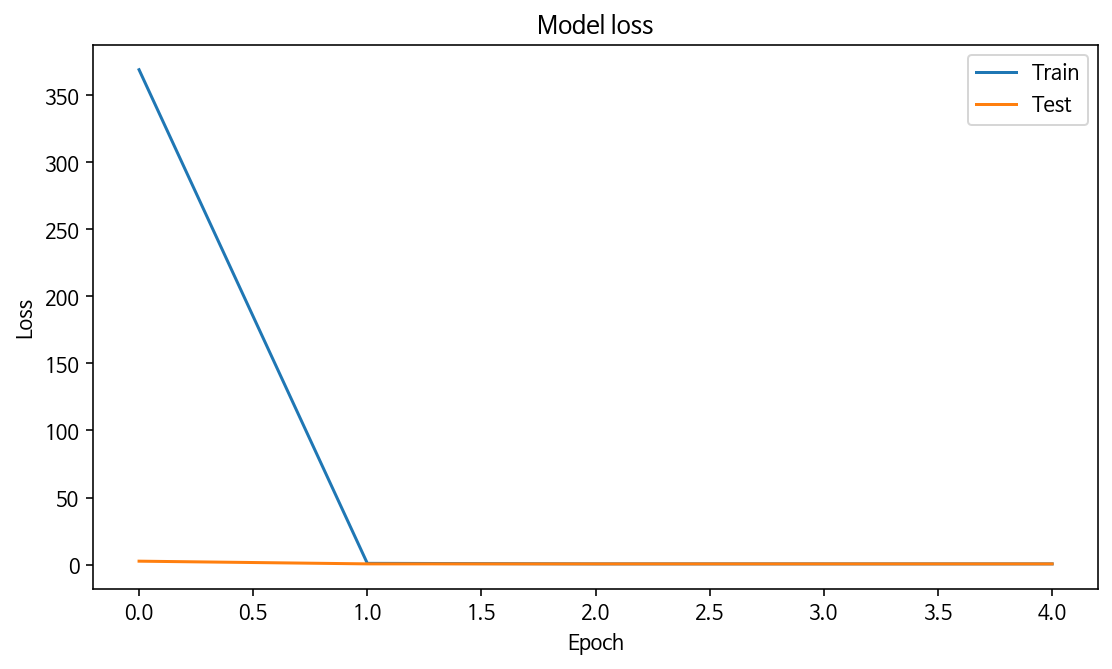

In [ ]:
# 훈련 과정 시각화 (loss)
plt.figure(figsize=(9, 5))#plot size
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

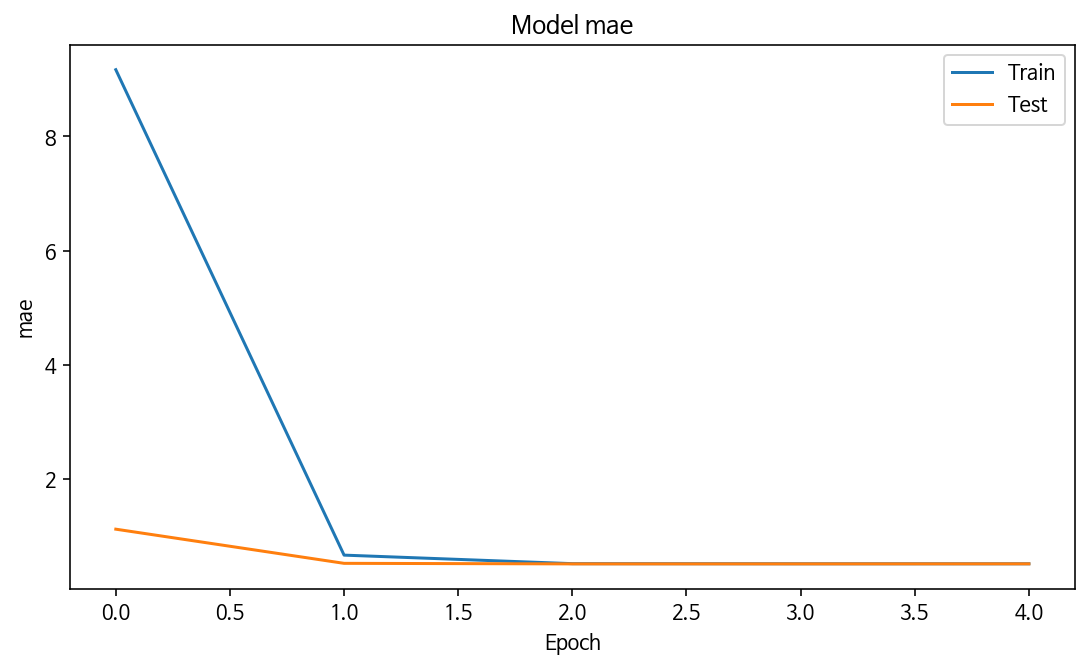

In [ ]:
# 훈련 과정 시각화 (mae)
plt.figure(figsize=(9, 5))#plot size
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

- 샘플 모델 평가

In [ ]:
model.evaluate(X_test,y_test)

3353/3353 [==============================] - 10s 3ms/step - loss: 0.5274 - mae: 0.5167


[0.5273510217666626, 0.5166669487953186]

In [ ]:
model.save('/content/drive/MyDrive/test/X_sample.h5')

- 실제로 데이터 사용해서 구축

In [ ]:
df1.shape
df1.info()
df2_log1p_scaled.shape
df2_log1p_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363799 entries, 0 to 5363798
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SEX               float64
 1   AGE_GROUP         float64
 2   HEIGHT            float64
 3   WEIGHT            float64
 4   SMK_STAT_TYPE_CD  float64
 5   DRK_YN            float64
dtypes: float64(6)
memory usage: 245.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363799 entries, 0 to 5363798
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   WAIST         float64
 1   BP_HIGH       float64
 2   BP_LWST       float64
 3   BLDS          float64
 4   TOT_CHOLE     float64
 5   TRIGLYCERIDE  float64
 6   HDL_CHOLE     float64
 7   LDL_CHOLE     float64
 8   HMG           float64
 9   CREATININE    float64
 10  SGOT_AST      float64
 11  SGPT_ALT      float64
 12  GAMMA_GTP     float64
 13  BMI           float64
 14  eGFR          float64
dtypes: float64(15)
memory

In [ ]:
#데이터나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1,df2_log1p_scaled,test_size=0.2, random_state=0)

In [ ]:
y_test.head()

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
682914,-1.648963,-1.211289,-1.393166,0.343242,0.370730,-1.461066,0.467401,0.568546,-1.239348,-1.057417,0.109865,-0.245225,0.093544,-1.910565,0.679676
813683,-0.901098,-0.856116,-1.731894,-0.622799,0.199452,-0.651695,1.231762,-0.089697,-0.420965,-0.332683,1.015423,0.399795,-0.213076,-1.257699,0.504819
2838841,-0.312861,0.479315,0.351596,0.058672,0.040705,0.323143,0.319334,-0.112636,0.090158,0.000000,0.774247,0.277364,0.407059,-1.021911,0.240458
26452,-1.079851,-0.520685,-0.182709,-0.428662,-0.061855,-0.517969,0.787525,-0.182748,-0.518108,-0.332683,-0.774247,-0.762912,-1.023143,-0.077072,0.093359
1129265,-1.357937,-1.719901,-1.617138,-0.689019,-1.590684,-0.631733,0.562305,-1.980018,-0.420965,0.615826,-0.114542,-0.432596,-0.403008,-0.860771,-0.267914


In [ ]:
#모델 구조 만들기
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
X=tf.keras.layers.Input(shape=[6])#6개 입력층 생성
Y=tf.keras.layers.Dense(15)(X) #15개 출력층 생성 #https://wikidocs.net/60683
model = tf.keras.models.Model(X,Y)
model.compile(optimizer=Adam(lr=1e-4),loss='mse', metrics='mae')#https://velog.io/@yuns_u/평균제곱오차MSE-평균절대오차MAE
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_1 (Dense)             (None, 15)                105       
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
############################################################모델 훈련 optimizer adam lr0.0001 #에폭당7분
history = model.fit(X_train,y_train,epochs=3, validation_split=0.2)
print(history.history)

Epoch 1/3
107276/107276 [==============================] - 446s 4ms/step - loss: 58.4467 - mae: 1.7239 - val_loss: 0.5247 - val_mae: 0.5157
Epoch 2/3
107276/107276 [==============================] - 403s 4ms/step - loss: 0.5226 - mae: 0.5141 - val_loss: 0.5234 - val_mae: 0.5144
Epoch 3/3
107276/107276 [==============================] - 401s 4ms/step - loss: 0.5221 - mae: 0.5129 - val_loss: 0.5221 - val_mae: 0.5121
{'loss': [58.44670104980469, 0.5225570201873779, 0.5220568180084229], 'mae': [1.7239030599594116, 0.5141064524650574, 0.5128878951072693], 'val_loss': [0.5246922373771667, 0.5234484672546387, 0.52205491065979], 'val_mae': [0.5157079100608826, 0.5143597722053528, 0.5121088624000549]}


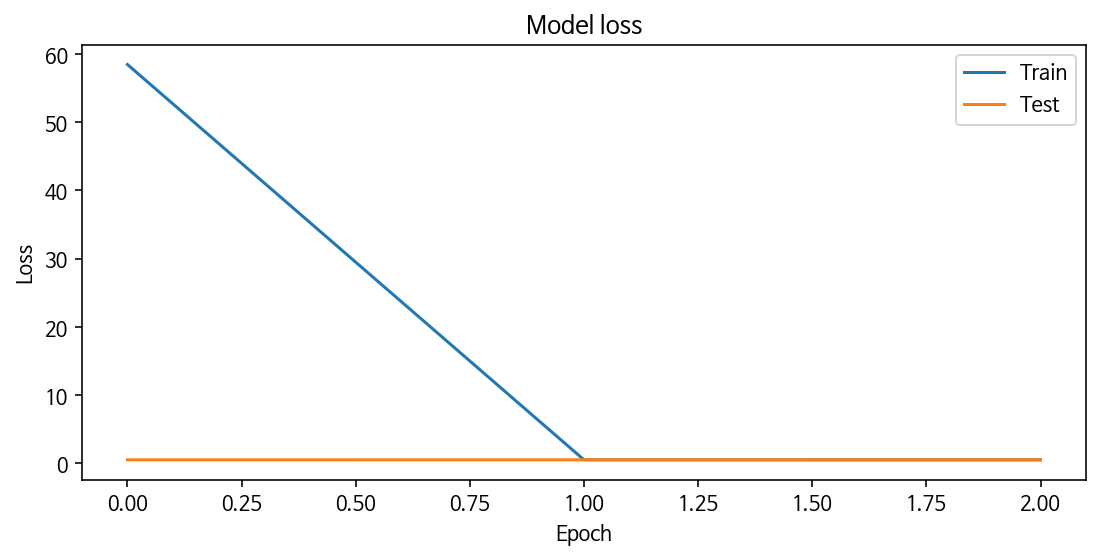

In [ ]:
# 훈련 과정 시각화 (loss)
plt.figure(figsize=(9, 4))#plot size
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

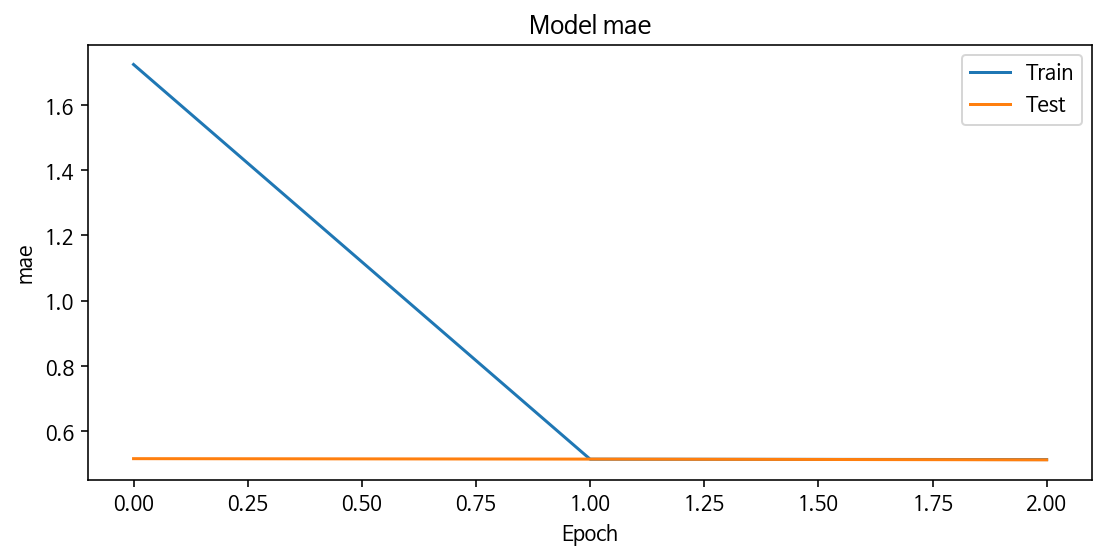

In [ ]:
# 훈련 과정 시각화 (mae)
plt.figure(figsize=(9, 4))#plot size
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

- 모델 평가

In [ ]:
model.evaluate(X_test,y_test)

33524/33524 [==============================] - 105s 3ms/step - loss: 0.5208 - mae: 0.5119


[0.5207517743110657, 0.51192307472229]

In [ ]:
model.save('/content/drive/MyDrive/test/train_model.h5')

# 모델 예측하기 생략

In [ ]:
#텐서플로우 불러오기
import tensorflow as tf
#저장한 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/test/train_model.h5')

In [ ]:
#테스트해보기
sex = input("성별을 입력하세요(남자/여자): ")
age = input("나이를 입력하세요(숫자만): ")
height = input("키(cm)를 입력하세요: ")
weight = input("몸무게(kg)를 입력하세요: ")
흡연여부 = input("흡연여부를 입력하세요(안핌/핌): ")
음주여부 = input("음주여부를 입력하세요(안함/함): ")
data=[sex, age, height, weight, 흡연여부, 음주여부]#list
data=pd.DataFrame([data],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN'])#.astype('category') 원핫 안함 #data3=pd.get_dummies(data2)
data=data.replace(['남자','안핌','안함'],0)
data=data.replace(['여자','핌','함'],1)

predicted_df = pd.DataFrame(model.predict(np.asarray(data).astype('float')),columns=['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE',
       'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST', 'SGPT_ALT','GAMMA_GTP', 'BMI', 'eGFR'])#list
scaler = RobustScaler()
scaler.fit(df2_log1p)
predicted_df_rescaled = scaler.inverse_transform(predicted_df)
predicted_df_rescaled_expm1 = np.expm1(predicted_df_rescaled)
pred_df = pd.DataFrame(predicted_df_rescaled_expm1,columns=['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE',
       'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST', 'SGPT_ALT','GAMMA_GTP', 'BMI', 'eGFR'])
pred_df

성별을 입력하세요(남자/여자): 여자
나이를 입력하세요(숫자만): 35
키(cm)를 입력하세요: 160
몸무게(kg)를 입력하세요: 95
흡연여부를 입력하세요(안핌/핌): 안핌
음주여부를 입력하세요(안함/함): 함


,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR
0,102.556679,129.185562,81.721153,102.079147,207.320435,160.929504,48.304932,121.074463,13.831966,0.75255,25.795347,34.76265,32.652451,38.442879,87.485367


In [ ]:
#df 새로 만들어서 출력?
#아산병원 정보
#당뇨병 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
#정상수치 : 공복혈당 126 미만
#0:정상 1:의심
pred_df['t_diabetes'] = np.where(pred_df['BLDS']>=126, '의심','정상')
print('당뇨: ',pred_df['t_diabetes'])

#빈혈 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
#정상수치 : 혈색소(헤모글로빈) 남자일 때 13~17, 여자일 때 12~16 
#0:정상 1:의심
conditions = [
             (data['SEX'] == 0) & (pred_df['HMG']<13),
             (data['SEX'] == 1) & (pred_df['HMG']<12),
             (data['SEX'] == 0) & (pred_df['HMG']>17),
             (data['SEX'] == 1) & (pred_df['HMG']>16),
]
vals = ['의심','의심','의심','의심']

pred_df['t_anemia'] = np.select(conditions, vals)
pred_df['t_anemia'] = np.where(pred_df['t_anemia']=='0', '정상',pred_df['t_anemia'])
print('빈혈: ',pred_df['t_anemia'])

#간수치 http://amc.seoul.kr/asan/mobile/healthinfo/management/managementDetail.do?managementId=36
#정상수치 : AST&ALT 40이하, GTP 남자일 때 10~71, 여자일 때 6~42
#0:정상 1:의심
conditions = [
             (data['SEX'] == 0) & (pred_df['GAMMA_GTP']<10) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
             (data['SEX'] == 0) & (pred_df['GAMMA_GTP']>71) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
             (data['SEX'] == 1) & (pred_df['GAMMA_GTP']<6) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
             (data['SEX'] == 1) & (pred_df['GAMMA_GTP']>42) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40)
]
vals = ['의심','의심','의심','의심']

pred_df['t_liver'] = np.select(conditions, vals)
pred_df['t_liver'] = np.where(pred_df['t_liver']=='0', '정상', pred_df['t_liver'])
print('간수치: ',pred_df['t_liver'])

#사구체여과율 https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
# 정상 사구체 여과율은 분당 90~120ml
#0:정상 1:의심

conditions = [
             (pred_df['eGFR']<90),
             (pred_df['eGFR']>120)
]
vals = ['의심', '의심']
pred_df['t_egfr'] = np.select(conditions, vals)
pred_df['t_egfr'] = np.where(pred_df['t_egfr']=='0', '정상',pred_df['t_egfr'])
print('신장수치: ',pred_df['t_egfr'])

#복부비만 https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
#정상수치 : BMI 25미만, WAIST 남자일 때 90미만, 여자일 때 85미만
#0:정상 1:의심
conditions = [
             (data['SEX'] == 0) & (pred_df['BMI']>=25) & (pred_df['WAIST']>=90),
             (data['SEX'] == 1) & (pred_df['BMI']>=25) & (pred_df['WAIST']>=85)
]
vals = ['의심', '의심']

pred_df['t_abdominal'] = np.select(conditions, vals)
pred_df['t_abdominal'] = np.where(pred_df['t_abdominal']=='0', '정상',pred_df['t_abdominal'])
print('복부비만: ',pred_df['t_abdominal'])

#체질량지수 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
# 저체중 <18.5 # 정상 18.5~22.9 # 위험체중 23~24.9 # 1단계 비만 25~29.9 # 2단계 비만 >=30
#0:정상 1:저체중 2:위험체중 3:1단계 비만 4:2단계 비만
conditions = [
             (pred_df['BMI']<18.5),(pred_df['BMI']<23),(pred_df['BMI']<25),(pred_df['BMI']<30),(pred_df['BMI']>=30)
             ]
vals = ['저체중', '정상', '위험체중', '1단계 비만', '2단계 비만']

pred_df['t_bmi'] = np.select(conditions, vals)
print('비만: ',pred_df['t_bmi'])

#고지혈증 http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
#정상수치 : 총콜레스테롤<=200,LDL콜레스테롤<=130, HDL콜레스테롤>=60, 중성지방<=200
#경계위험수치 : 총콜레스테롤<240, LDL콜레스테롤<160, 중성지방<400
#고위험수치 : 총콜레스테롤>=240,LDL콜레스테롤>=160, HDL콜레스테롤<35, 중성지방>=400
#0:정상 1:경계 2: 위험
conditions = [
             (pred_df['TOT_CHOLE'] <=200) & (pred_df['LDL_CHOLE']<=130) & (pred_df['HDL_CHOLE']>=60)& (pred_df['TRIGLYCERIDE']<=200) ,
             (pred_df['TOT_CHOLE'] <240)  & (pred_df['LDL_CHOLE']<160)& (pred_df['TRIGLYCERIDE']<400),
             (pred_df['TOT_CHOLE'] >=240) & (pred_df['LDL_CHOLE']>=160) & (pred_df['HDL_CHOLE']<35)& (pred_df['TRIGLYCERIDE']>=400) 
]
vals = ['정상','경계위험','고위험']

pred_df['t_hyperlipidemia'] = np.select(conditions, vals)
print('고지혈증: ',pred_df['t_hyperlipidemia'])

#고혈압 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31322
# ① 정상 혈압 : 수축기 혈압 120mmHg 미만, 확장기 혈압 80mmHg 미만
# ② 고혈압 전 단계 : 수축기 혈압 120~139mmHg이거나, 확장기 혈압 80~89mmHg
# ③ 1기 고혈압(경도 고혈압) : 수축기 혈압 140~159mmHg이거나, 확장기 혈압 90~99mmHg
# ④ 2기 고혈압(중등도 이상 고혈압) : 수축기 혈압 160mmHg 이상이거나, 확장기 혈압 100mmHg 이상

#0:정상 1:고혈압 전 단계 2:경도 고혈압 3:중등도 이상 고혈압
conditions = [
             (pred_df['BP_HIGH']<120) & (pred_df['BP_LWST']<80),
             (pred_df['BP_HIGH']<140) & (pred_df['BP_LWST']<90),
             (pred_df['BP_HIGH']<160) & (pred_df['BP_LWST']<100),
             (pred_df['BP_HIGH']>=160) & (pred_df['BP_LWST']>=100)
]
vals = ['정상','고혈압 전 단계','경도 고혈압','중등도 이상 고혈압']

pred_df['t_hypertension'] = np.select(conditions, vals)
print('고혈압: ',pred_df['t_hypertension'])

당뇨:  0    정상
Name: t_diabetes, dtype: object
빈혈:  0    정상
Name: t_anemia, dtype: object
간수치:  0    정상
Name: t_liver, dtype: object
신장수치:  0    의심
Name: t_egfr, dtype: object
복부비만:  0    의심
Name: t_abdominal, dtype: object
비만:  0    2단계 비만
Name: t_bmi, dtype: object
고지혈증:  0    경계위험
Name: t_hyperlipidemia, dtype: object
고혈압:  0    고혈압 전 단계
Name: t_hypertension, dtype: object


In [ ]:
pred_df

,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,BMI,eGFR,t_diabetes,t_anemia,t_liver,t_egfr,t_abdominal,t_bmi,t_hyperlipidemia,t_hypertension
0,102.556679,129.185562,81.721153,102.079147,207.320435,160.929504,48.304932,121.074463,13.831966,0.75255,25.795347,34.76265,32.652451,38.442879,87.485367,정상,정상,정상,의심,의심,2단계 비만,경계위험,고혈압 전 단계


In [ ]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WAIST             1 non-null      float32
 1   BP_HIGH           1 non-null      float32
 2   BP_LWST           1 non-null      float32
 3   BLDS              1 non-null      float32
 4   TOT_CHOLE         1 non-null      float32
 5   TRIGLYCERIDE      1 non-null      float32
 6   HDL_CHOLE         1 non-null      float32
 7   LDL_CHOLE         1 non-null      float32
 8   HMG               1 non-null      float32
 9   CREATININE        1 non-null      float32
 10  SGOT_AST          1 non-null      float32
 11  SGPT_ALT          1 non-null      float32
 12  GAMMA_GTP         1 non-null      float32
 13  BMI               1 non-null      float32
 14  eGFR              1 non-null      float32
 15  t_diabetes        1 non-null      object 
 16  t_anemia          1 non-null      object 
 17  t

In [ ]:
np.asarray(data, dtype=object)

array([[  1.,  35., 160.,  95.,   0.,   1.]])

In [ ]:
model.predict(np.asarray(data, dtype=float))

array([[ 1.4601284 ,  0.4416713 ,  0.4975712 ,  0.40282732,  0.30160058,
         0.54172444, -0.33712423,  0.19224548, -0.1690498 , -0.49706277,
         0.29651594,  0.8469205 ,  0.39505112,  2.564654  ,  0.09681973]],
      dtype=float32)

# 함수 정의

In [ ]:
#텐서플로우 불러오기
import tensorflow as tf
#저장한 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/test/train_model.h5')

In [ ]:
#원본데이터(df)에 t컬럼 추가함 시각화에 사용
df['t_diabetes'] = np.where(df['BLDS']>=126, '의심','정상')

conditions = [
            (df['SEX'] == 0) & (df['HMG']<13),
            (df['SEX'] == 1) & (df['HMG']<12),
            (df['SEX'] == 0) & (df['HMG']>17),
            (df['SEX'] == 1) & (df['HMG']>16),
]
vals = ['의심','의심','의심','의심']

df['t_anemia'] = np.select(conditions, vals)
df['t_anemia'] = np.where(df['t_anemia']=='0', '정상',df['t_anemia'])

conditions = [
            (df['SEX'] == 0) & (df['GAMMA_GTP']<10) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
            (df['SEX'] == 0) & (df['GAMMA_GTP']>71) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
            (df['SEX'] == 1) & (df['GAMMA_GTP']<6) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40),
            (df['SEX'] == 1) & (df['GAMMA_GTP']>42) & (df['SGOT_AST']>40) & (df['SGPT_ALT']>40)
]
vals = ['의심','의심','의심','의심']

df['t_liver'] = np.select(conditions, vals)
df['t_liver'] = np.where(df['t_liver']=='0', '정상', df['t_liver'])

conditions = [
            (df['eGFR']<90),
            (df['eGFR']>120)
]
vals = ['의심', '의심']
df['t_egfr'] = np.select(conditions, vals)
df['t_egfr'] = np.where(df['t_egfr']=='0', '정상',df['t_egfr'])

conditions = [
            (df['SEX'] == 0) & (df['BMI']>=25) & (df['WAIST']>=90),
            (df['SEX'] == 1) & (df['BMI']>=25) & (df['WAIST']>=85)
]
vals = ['의심', '의심']

df['t_abdominal'] = np.select(conditions, vals)
df['t_abdominal'] = np.where(df['t_abdominal']=='0', '정상',df['t_abdominal'])

conditions = [
            (df['BMI']<18.5),(df['BMI']<23),(df['BMI']<25),(df['BMI']<30),(df['BMI']>=30)
            ]
vals = ['저체중', '정상', '위험체중', '1단계 비만', '2단계 비만']

df['t_bmi'] = np.select(conditions, vals)
df['t_bmi'] = np.where(df['t_bmi']=='0', '정상',df['t_bmi'])

conditions = [
            (df['TOT_CHOLE'] <=200) & (df['LDL_CHOLE']<=130) & (df['HDL_CHOLE']>=60)& (df['TRIGLYCERIDE']<=200) ,
            (df['TOT_CHOLE'] <240)  & (df['LDL_CHOLE']<160)& (df['TRIGLYCERIDE']<400),
            (df['TOT_CHOLE'] >=240) & (df['LDL_CHOLE']>=160) & (df['HDL_CHOLE']<35)& (df['TRIGLYCERIDE']>=400) 
]
vals = ['정상','경계위험','고위험']

df['t_hyperlipidemia'] = np.select(conditions, vals)
df['t_hyperlipidemia'] = np.where(df['t_hyperlipidemia']=='0', '정상',df['t_hyperlipidemia'])

conditions = [
            (df['BP_HIGH']<120) & (df['BP_LWST']<80),
            (df['BP_HIGH']<140) & (df['BP_LWST']<90),
            (df['BP_HIGH']<160) & (df['BP_LWST']<100),
            (df['BP_HIGH']>=160) & (df['BP_LWST']>=100)
]
vals = ['정상','고혈압 전 단계','경도 고혈압','중등도 이상 고혈압']

df['t_hypertension'] = np.select(conditions, vals)
df['t_hypertension'] = np.where(df['t_hypertension']=='0', '정상',df['t_hypertension'])
#합친 데이터 저장
df.to_csv('/content/drive/MyDrive/test/merge_df_target.csv', encoding='euc-kr', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363799 entries, 0 to 5363798
Data columns (total 32 columns):
 #   Column            Dtype  
---  ------            -----  
 0   HCHK_YEAR         float64
 1   SEX               float64
 2   AGE_GROUP         float64
 3   SIDO              float64
 4   HEIGHT            float64
 5   WEIGHT            float64
 6   WAIST             float64
 7   BP_HIGH           float64
 8   BP_LWST           float64
 9   BLDS              float64
 10  TOT_CHOLE         float64
 11  TRIGLYCERIDE      float64
 12  HDL_CHOLE         float64
 13  LDL_CHOLE         float64
 14  HMG               float64
 15  OLIG_PROTE_CD     float64
 16  CREATININE        float64
 17  SGOT_AST          float64
 18  SGPT_ALT          float64
 19  GAMMA_GTP         float64
 20  SMK_STAT_TYPE_CD  float64
 21  DRK_YN            float64
 22  BMI               float64
 23  eGFR              float64
 24  t_diabetes        object 
 25  t_anemia          object 
 26  t_liver       

In [ ]:
def 건강예측() :
  sex = input("[1/6]성별을 입력하세요(남자/여자): ")
  age = input("[2/6]나이를 입력하세요(숫자만): ")
  height = input("[3/6]키(cm)를 입력하세요: ")
  weight = input("[4/6]몸무게(kg)를 입력하세요: ")
  흡연여부 = input("[5/6]흡연여부를 입력하세요(안핌/핌): ")
  음주여부 = input("[6/6]음주여부를 입력하세요(안함/함): ")
  data=[sex, age, height, weight, 흡연여부, 음주여부]#list
  data=pd.DataFrame([data],columns=['SEX', 'AGE_GROUP','HEIGHT', 'WEIGHT','SMK_STAT_TYPE_CD', 'DRK_YN'])#.astype('category') 원핫 안함 #data3=pd.get_dummies(data2)
  data=data.replace(['남자','안핌','안함'],0)
  data=data.replace(['여자','핌','함'],1)
  predicted_df = pd.DataFrame(model.predict(np.asarray(data).astype('float')),columns=['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE',
        'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST', 'SGPT_ALT','GAMMA_GTP', 'BMI', 'eGFR'])#list
  scaler = RobustScaler()
  scaler.fit(df2_log1p)
  predicted_df_rescaled = scaler.inverse_transform(predicted_df)
  predicted_df_rescaled_expm1 = np.expm1(predicted_df_rescaled)
  pred_df = pd.DataFrame(predicted_df_rescaled_expm1,columns=['WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE',
        'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'CREATININE', 'SGOT_AST', 'SGPT_ALT','GAMMA_GTP', 'BMI', 'eGFR'])
  pred_df

  #아산병원 정보
  #당뇨병 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
  #정상수치 : 공복혈당 126 미만
  #0:정상 1:의심
  pred_df['t_diabetes'] = np.where(pred_df['BLDS']>=126, '의심','정상')
  print('당뇨: ',pred_df['t_diabetes'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596')

  #빈혈 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
  #정상수치 : 혈색소(헤모글로빈) 남자일 때 13~17, 여자일 때 12~16 
  #0:정상 1:의심
  conditions = [
              (data['SEX'] == 0) & (pred_df['HMG']<13),
              (data['SEX'] == 1) & (pred_df['HMG']<12),
              (data['SEX'] == 0) & (pred_df['HMG']>17),
              (data['SEX'] == 1) & (pred_df['HMG']>16),
  ]
  vals = ['의심','의심','의심','의심']

  pred_df['t_anemia'] = np.select(conditions, vals)
  pred_df['t_anemia'] = np.where(pred_df['t_anemia']=='0', '정상',pred_df['t_anemia'])
  print('빈혈: ',pred_df['t_anemia'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119')

  #간수치 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36
  #정상수치 : AST&ALT 40이하, GTP 남자일 때 10~71, 여자일 때 6~42
  #0:정상 1:의심
  conditions = [
              (data['SEX'] == 0) & (pred_df['GAMMA_GTP']<10) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
              (data['SEX'] == 0) & (pred_df['GAMMA_GTP']>71) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
              (data['SEX'] == 1) & (pred_df['GAMMA_GTP']<6) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40),
              (data['SEX'] == 1) & (pred_df['GAMMA_GTP']>42) & (pred_df['SGOT_AST']>40) & (pred_df['SGPT_ALT']>40)
  ]
  vals = ['의심','의심','의심','의심']

  pred_df['t_liver'] = np.select(conditions, vals)
  pred_df['t_liver'] = np.where(pred_df['t_liver']=='0', '정상', pred_df['t_liver'])
  print('간수치: ',pred_df['t_liver'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36')

  #사구체여과율 https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
  # 정상 사구체 여과율은 분당 90~120ml
  #0:정상 1:의심

  conditions = [
              (pred_df['eGFR']<90),
              (pred_df['eGFR']>120)
  ]
  vals = ['의심', '의심']
  pred_df['t_egfr'] = np.select(conditions, vals)
  pred_df['t_egfr'] = np.where(pred_df['t_egfr']=='0', '정상',pred_df['t_egfr'])
  print('신장수치: ',pred_df['t_egfr'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133')

  #복부비만 https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
  #정상수치 : BMI 25미만, WAIST 남자일 때 90미만, 여자일 때 85미만
  #0:정상 1:의심
  conditions = [
              (data['SEX'] == 0) & (pred_df['BMI']>=25) & (pred_df['WAIST']>=90),
              (data['SEX'] == 1) & (pred_df['BMI']>=25) & (pred_df['WAIST']>=85)
  ]
  vals = ['의심', '의심']

  pred_df['t_abdominal'] = np.select(conditions, vals)
  pred_df['t_abdominal'] = np.where(pred_df['t_abdominal']=='0', '정상',pred_df['t_abdominal'])
  print('복부비만: ',pred_df['t_abdominal'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912')

  #체질량지수 https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
  # 저체중 <18.5 # 정상 18.5~22.9 # 위험체중 23~24.9 # 1단계 비만 25~29.9 # 2단계 비만 >=30
  #0:정상 1:저체중 2:위험체중 3:1단계 비만 4:2단계 비만
  conditions = [
              (pred_df['BMI']<18.5),(pred_df['BMI']<23),(pred_df['BMI']<25),(pred_df['BMI']<30),(pred_df['BMI']>=30)
              ]
  vals = ['저체중', '정상', '위험체중', '1단계 비만', '2단계 비만']

  pred_df['t_bmi'] = np.select(conditions, vals)
  df['t_bmi'] = np.where(df['t_bmi']=='0', '정상',df['t_bmi'])
  print('비만: ',pred_df['t_bmi'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143')

  #고지혈증 http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
  #정상수치 : 총콜레스테롤<=200,LDL콜레스테롤<=130, HDL콜레스테롤>=60, 중성지방<=200
  #경계위험수치 : 총콜레스테롤<240, LDL콜레스테롤<160, 중성지방<400
  #고위험수치 : 총콜레스테롤>=240,LDL콜레스테롤>=160, HDL콜레스테롤<35, 중성지방>=400
  #0:정상 1:경계 2: 위험
  conditions = [
              (pred_df['TOT_CHOLE'] <=200) & (pred_df['LDL_CHOLE']<=130) & (pred_df['HDL_CHOLE']>=60)& (pred_df['TRIGLYCERIDE']<=200) ,
              (pred_df['TOT_CHOLE'] <240)  & (pred_df['LDL_CHOLE']<160)& (pred_df['TRIGLYCERIDE']<400),
              (pred_df['TOT_CHOLE'] >=240) & (pred_df['LDL_CHOLE']>=160) & (pred_df['HDL_CHOLE']<35)& (pred_df['TRIGLYCERIDE']>=400) 
  ]
  vals = ['정상','경계위험','고위험']

  pred_df['t_hyperlipidemia'] = np.select(conditions, vals) 
  df['t_hyperlipidemia'] = np.where(df['t_hyperlipidemia']=='0', '정상',df['t_hyperlipidemia'])

  print('고지혈증: ',pred_df['t_hyperlipidemia'][0], ' 질병에 관련 된 링크 클릭→ http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191')

  #고혈압 https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31322
  # ① 정상 혈압 : 수축기 혈압 120mmHg 미만, 확장기 혈압 80mmHg 미만
  # ② 고혈압 전 단계 : 수축기 혈압 120~139mmHg이거나, 확장기 혈압 80~89mmHg
  # ③ 1기 고혈압(경도 고혈압) : 수축기 혈압 140~159mmHg이거나, 확장기 혈압 90~99mmHg
  # ④ 2기 고혈압(중등도 이상 고혈압) : 수축기 혈압 160mmHg 이상이거나, 확장기 혈압 100mmHg 이상

  #0:정상 1:고혈압 전 단계 2:경도 고혈압 3:중등도 이상 고혈압
  conditions = [
              (pred_df['BP_HIGH']<120) & (pred_df['BP_LWST']<80),
              (pred_df['BP_HIGH']<140) & (pred_df['BP_LWST']<90),
              (pred_df['BP_HIGH']<160) & (pred_df['BP_LWST']<100),
              (pred_df['BP_HIGH']>=160) & (pred_df['BP_LWST']>=100)
  ]
  vals = ['정상','고혈압 전 단계','경도 고혈압','중등도 이상 고혈압']

  pred_df['t_hypertension'] = np.select(conditions, vals)
  df['t_hypertension'] = np.where(df['t_hypertension']=='0', '정상',df['t_hypertension'])
  print('고혈압: ',pred_df['t_hypertension'][0], ' 질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31322')

# 모델 구현

In [ ]:
건강예측()

[1/6]성별을 입력하세요(남자/여자): 여자
[2/6]나이를 입력하세요(숫자만): 27
[3/6]키(cm)를 입력하세요: 169
[4/6]몸무게(kg)를 입력하세요: 68
[5/6]흡연여부를 입력하세요(안핌/핌): 핌
[6/6]음주여부를 입력하세요(안함/함): 안함
당뇨:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
빈혈:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
간수치:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36
신장수치:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
복부비만:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
비만:  위험체중  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
고지혈증:  경계위험  질병에 관련 된 링크 클릭→ http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
고혈압:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseas

In [ ]:
건강예측()

[1/6]성별을 입력하세요(남자/여자): 남자
[2/6]나이를 입력하세요(숫자만): 30
[3/6]키(cm)를 입력하세요: 175
[4/6]몸무게(kg)를 입력하세요: 100
[5/6]흡연여부를 입력하세요(안핌/핌): 안핌
[6/6]음주여부를 입력하세요(안함/함): 함
당뇨:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
빈혈:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
간수치:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36
신장수치:  의심  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
복부비만:  의심  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
비만:  2단계 비만  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
고지혈증:  경계위험  질병에 관련 된 링크 클릭→ http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
고혈압:  고혈압 전 단계  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disea

In [ ]:
건강예측()

[1/6]성별을 입력하세요(남자/여자): 남자
[2/6]나이를 입력하세요(숫자만): 70
[3/6]키(cm)를 입력하세요: 165
[4/6]몸무게(kg)를 입력하세요: 45
[5/6]흡연여부를 입력하세요(안핌/핌): 핌
[6/6]음주여부를 입력하세요(안함/함): 안함
당뇨:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
빈혈:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
간수치:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36
신장수치:  의심  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
복부비만:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
비만:  저체중  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
고지혈증:  경계위험  질병에 관련 된 링크 클릭→ http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
고혈압:  고혈압 전 단계  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/d

In [ ]:
건강예측()

[1/6]성별을 입력하세요(남자/여자): 여자
[2/6]나이를 입력하세요(숫자만): 35
[3/6]키(cm)를 입력하세요: 160
[4/6]몸무게(kg)를 입력하세요: 90
[5/6]흡연여부를 입력하세요(안핌/핌): 안핌
[6/6]음주여부를 입력하세요(안함/함): 함
당뇨:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/disease/diseaseDetail.do?contentId=31596
빈혈:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=119
간수치:  정상  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=36
신장수치:  의심  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/body/bodyDetail.do?bodyId=133
복부비만:  의심  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthstory/medicalcolumn/medicalColumnDetail.do?medicalColumnId=33912
비만:  2단계 비만  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/management/managementDetail.do?managementId=143
고지혈증:  경계위험  질병에 관련 된 링크 클릭→ http://amc.seoul.kr/asan/depts/stroke/K/content.do?menuId=2191
고혈압:  고혈압 전 단계  질병에 관련 된 링크 클릭→ https://www.amc.seoul.kr/asan/healthinfo/diseas